# Convolutional Neural Network(CNN) for Fashion MNIST with Tensorflow Keras

Install **"visualkeras"** a python library to visualize neural network architecture 

In [1]:
# !pip install visualkeras
# !pip install seaborn

### 1. Loading all necessary *libraries* and *packages* 

In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.regularizers import L2
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2023-02-01 13:40:28.118755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 13:40:28.315413: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-01 13:40:28.902999: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-01 13:40:28.903069

Setting the model *parameters*

In [3]:
Img_shape = 28
Num_classes = 10
test_size = 0.2
random_state = 0
No_epochs = 100
Batch_size = 128
L2_regularization_rate = 1e-2

### 2. Loading the [Zalando Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Data

In [4]:
train_dataset = pd.read_csv("fashion-mnist_train.csv")
test_dataset = pd.read_csv("fashion-mnist_test.csv")

*Reading and Labeling the 10 Clothing categories*

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### 3. Pre-processing the data[[1]](https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist)

In [6]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

*Splitting the training data into training and validation set into a split ratio of 75-25 %*

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

> ### Convolutional Neural Network

### 6. Define the model

In [8]:
model = tf.keras.Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=L2(L2_regularization_rate), input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))


#model.add(Conv2D(64, 3, padding='same', kernel_regularizer=L2(L2_regularization_rate), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

'''
BELOW IS A MORE SOFISTICATED ARCHITECTURE 
'''
# model = tf.keras.Sequential()
# model.add(Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=L2(L2_regularization_rate), input_shape=(28, 28, 1)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=L2(L2_regularization_rate)))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.20))

# model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=L2(L2_regularization_rate)))
# model.add(BatchNormalization())
# model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=L2(L2_regularization_rate)))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.30))

# model.add(Conv2D(256, 3, activation='relu', padding='same', kernel_regularizer=L2(L2_regularization_rate)))
# model.add(BatchNormalization())
# model.add(Conv2D(256, 3, activation='relu', kernel_regularizer=L2(L2_regularization_rate)))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.40))        

# model.add(Flatten())

# model.add(Dense(1024, activation='relu', kernel_regularizer=L2(L2_regularization_rate)))
# # model.add(Dropout(0.35))

# model.add(Dense(512, activation='relu', kernel_regularizer=L2(L2_regularization_rate)))
# model.add(Dropout(0.30))

# model.add(Dense(10, activation='softmax'))



2023-02-01 13:40:43.668486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6690 MB memory:  -> device: 0, name: NVIDIA A16, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-02-01 13:40:43.669165: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 45 MB memory:  -> device: 1, name: NVIDIA A16, pci bus id: 0000:1c:00.0, compute capability: 8.6
2023-02-01 13:40:43.669833: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 10092 MB memory:  -> device: 2, name: NVIDIA A16, pci bus id: 0000:1d:00.0, compute capability: 8.6
2023-02-01 13:40:43.670525: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 10092 MB memory:  -> device: 3, name: NVIDIA A16, pci bus id: 0000:1e:00.0, compute capability: 8.6
2023

'\nBELOW IS A MORE SOFISTICATED ARCHITECTURE \n'

#### 6.5 Visualize the model

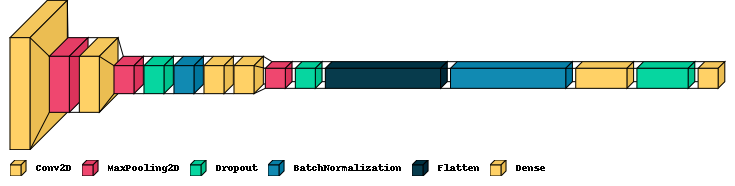

In [9]:
visualkeras.layered_view(model, legend=True)

### 7. Define optimizer, callback, and learning rate.

In [10]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
callback_val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

### 8. Train the model

In [11]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=100,
                  validation_data=(X_val, y_val))
#train_model = model.fit(X_train, y_train,
#                  batch_size=Batch_size,
#                  epochs=50,
#                  validation_data=(X_val, y_val), callbacks=callback_val_loss)

Epoch 1/100


2023-02-01 13:40:45.800075: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-02-01 13:40:48.091582: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2023-02-01 13:40:50.426861: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


375/375 [==============================] - 20s 27ms/step - loss: 0.6097 - accuracy: 0.7871 - val_loss: 1.3808 - val_accuracy: 0.5041
Epoch 2/100
375/375 [==============================] - 10s 27ms/step - loss: 0.4049 - accuracy: 0.8570 - val_loss: 0.3201 - val_accuracy: 0.8885
Epoch 3/100
375/375 [==============================] - 9s 25ms/step - loss: 0.3526 - accuracy: 0.8745 - val_loss: 0.2862 - val_accuracy: 0.8983
Epoch 4/100
375/375 [==============================] - 9s 24ms/step - loss: 0.3243 - accuracy: 0.8849 - val_loss: 0.2867 - val_accuracy: 0.8980
Epoch 5/100
375/375 [==============================] - 10s 26ms/step - loss: 0.3025 - accuracy: 0.8941 - val_loss: 0.2649 - val_accuracy: 0.9093
Epoch 6/100
375/375 [==============================] - 9s 25ms/step - loss: 0.2936 - accuracy: 0.8971 - val_loss: 0.2619 - val_accuracy: 0.9099
Epoch 7/100
375/375 [==============================] - 9s 25ms/step - loss: 0.2822 - accuracy: 0.8989 - val_loss: 0.2645 - val_accuracy: 0.9069
E

### 9. Evaluate the model

In [16]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2701 - accuracy: 0.9217
Test loss: 0.2701365649700165
Test accuracy: 0.9217000007629395
313/313 [==============================] - 2s 5ms/step


### 10. Visualizing the results

*Plotting 25 random images with predicted and real class of clothing*

In [19]:
for i in range(len(y_pred):
    
    


0


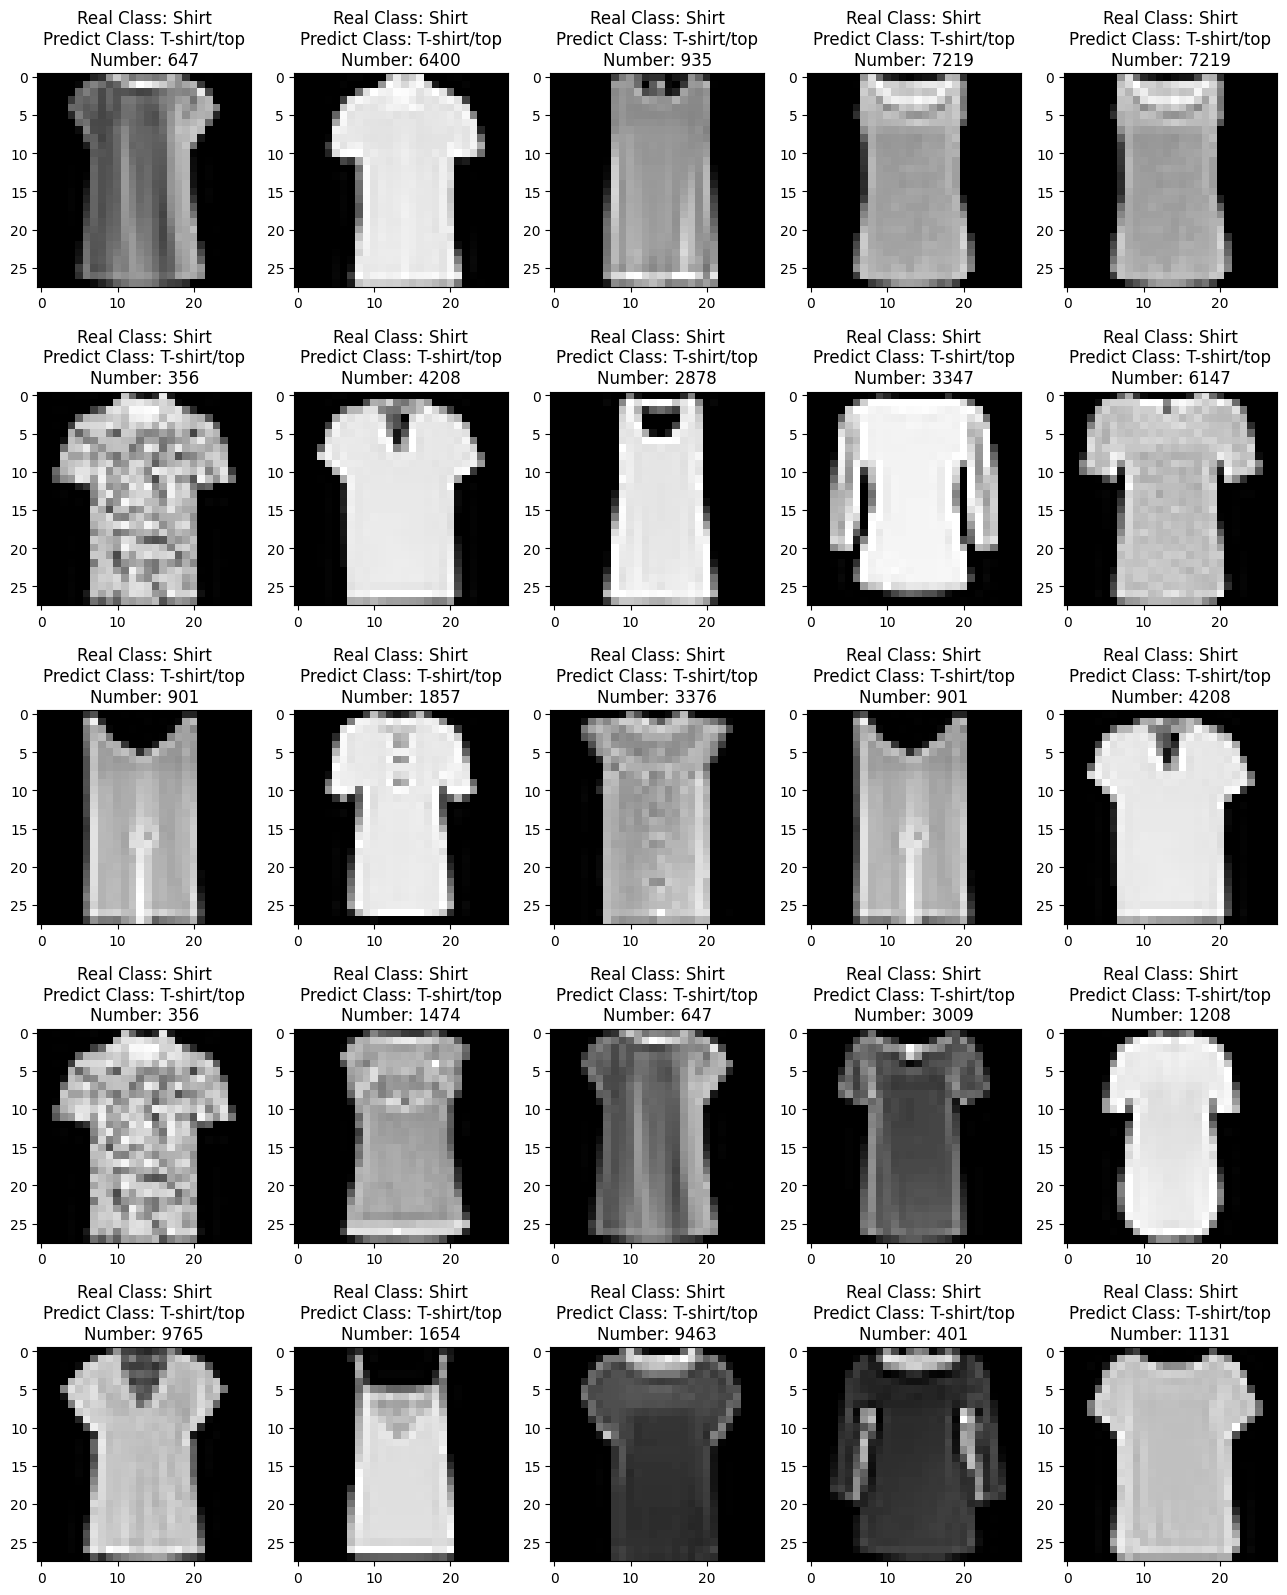

In [13]:
import random
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


X_test__ = X_test.reshape(X_test.shape[0], 28, 28)
idx_list = []
hard_label_list = [0, 6]
while len(idx_list) < 25:  
    i = random.randint(0, 9999)
    real_label = y_test[i].argmax()
    pred_label = y_pred[i].argmax()
    if pred_label != real_label and pred_label == 0 and real_label == 6 :
        idx_list.append(i)
        
fig, axis = plt.subplots(5, 5, figsize=(16, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[idx_list[i]], cmap='gray')
    ax.set(title = f"Real Class: {labels[y_test[idx_list[i]].argmax()]}\nPredict Class: {labels[y_pred[idx_list[i]].argmax()]}\nNumber: {idx_list[i]}");

*Plotting the confusion matrix*

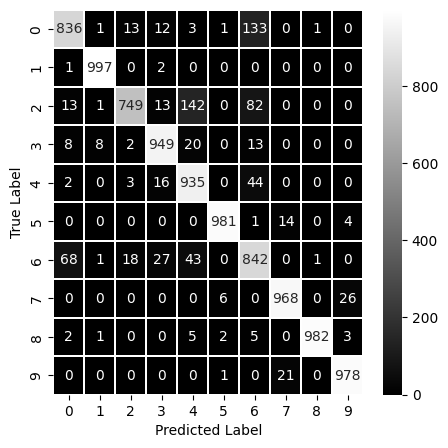

In [17]:
# y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
#plt.title("Confusion Matrix for initial model's training")
plt.show()

In [15]:
model.save('initial_overfitted_model')

INFO:tensorflow:Assets written to: initial_overfitted_model/assets


INFO:tensorflow:Assets written to: initial_overfitted_model/assets


> **References**

1. [CNN with Tensorflow|Keras for Fashion MNIST](https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist) by Gabriel Preda
